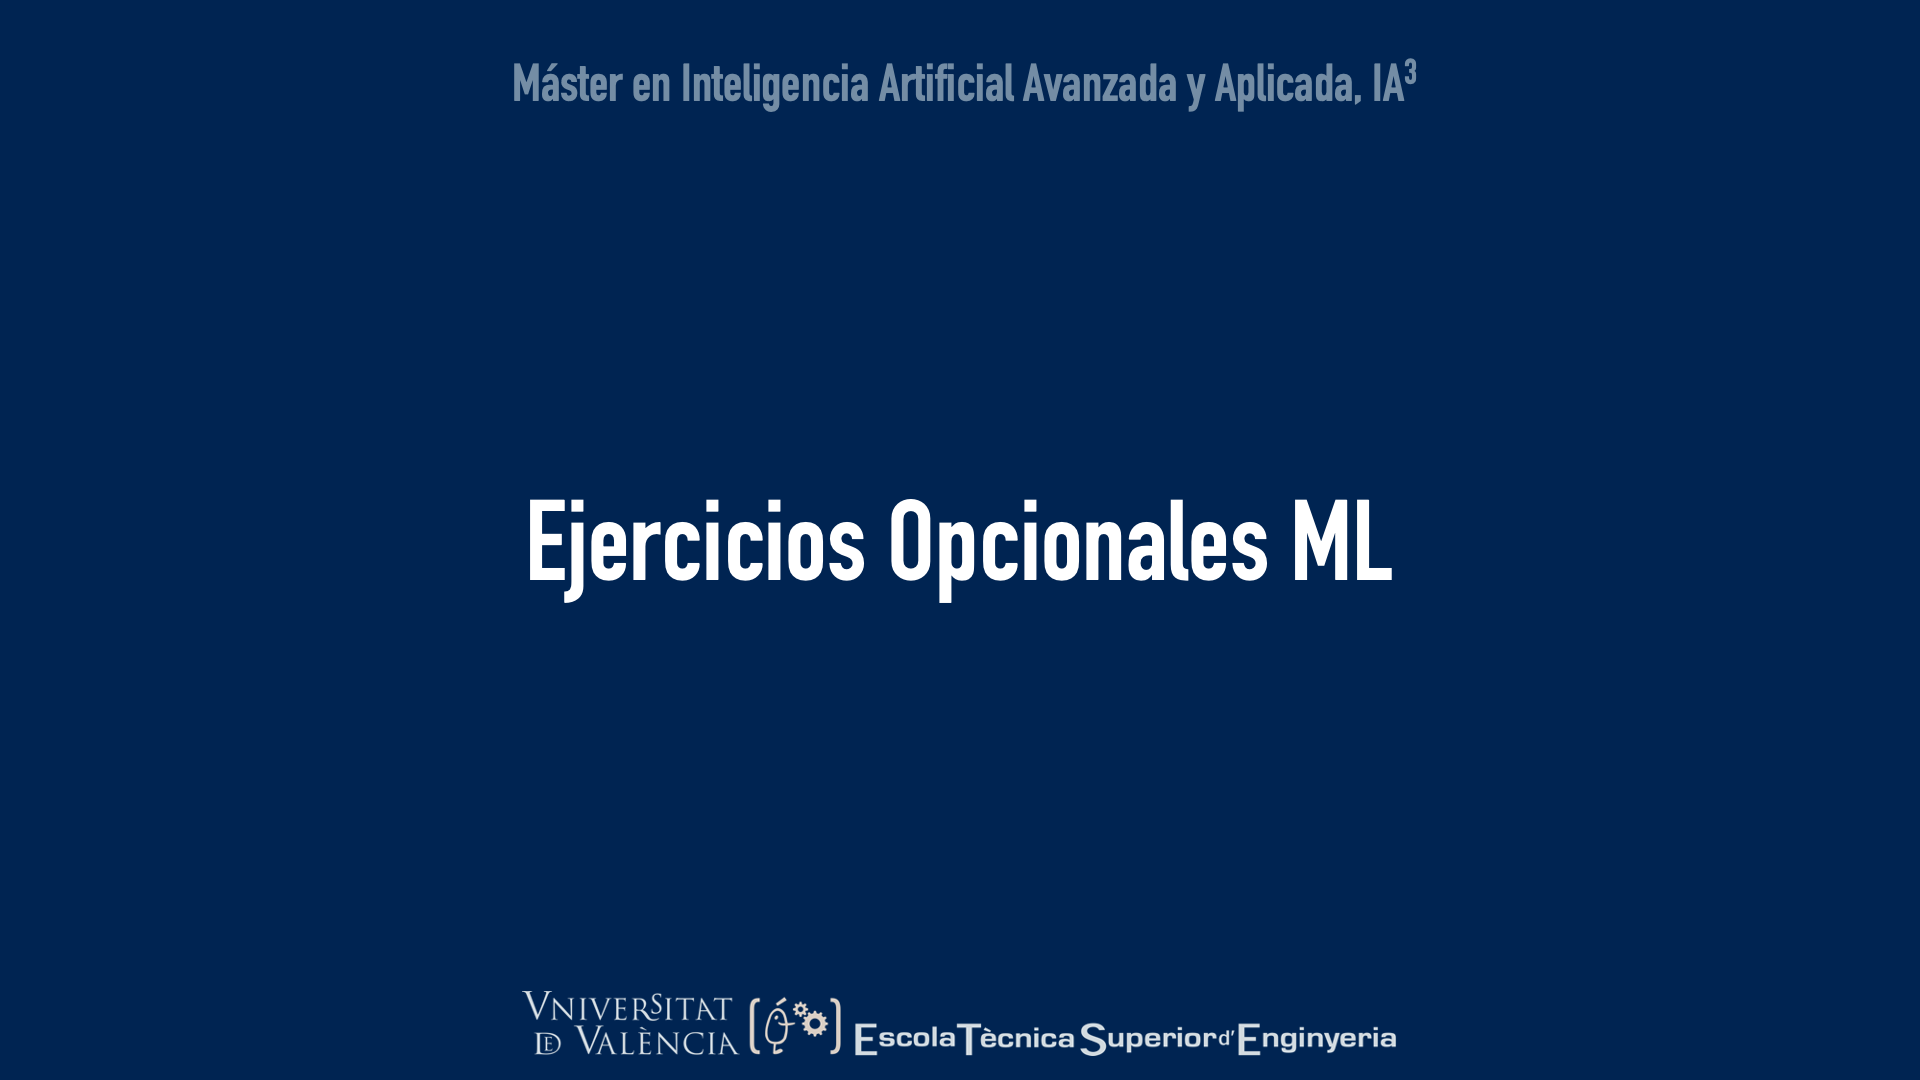

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

## Some Visualizations and Correlation Analysis with Numeric Variables




In [2]:
# Imports y carga del dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
dataset = sns.load_dataset("penguins")

In [3]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
dataset.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
dataset.dropna(inplace=True)
import plotly.express as px
fig = px.scatter(dataset, x='body_mass_g', y='bill_depth_mm', color='sex')
fig.show()

**NICE**! Two Set of Points on mass - bill_depth plane close to be linearly separable... (Ideal for Linear SVC with soft frontier)

In [6]:
fig = px.scatter(dataset, x='body_mass_g', y='bill_length_mm', color='sex')
fig.show()

In [7]:
fig = px.scatter(dataset, x='body_mass_g', y='flipper_length_mm', color='sex')
fig.show()

In [8]:
fig = px.scatter(dataset, x='bill_depth_mm', y='flipper_length_mm', color='sex')
fig.show()

In [9]:
fig = px.scatter(dataset, x='bill_length_mm', y='flipper_length_mm', color='sex')
fig.show()

In [10]:
fig = px.scatter(dataset, x='bill_length_mm', y='bill_depth_mm', color='sex')
fig.show()


#### Are Categorical Variables important For Sex Classifying?


In [10]:
pd.crosstab(index=dataset['sex'], columns=[dataset['species'],dataset['island']])

species Adelie                 Chinstrap Gentoo
island  Biscoe Dream Torgersen     Dream Biscoe
sex                                            
Female      22    27        24        34     58
Male        22    28        23        34     61

Intuively not but...


### REMARK: Features are different scale -> We have to use Scalers... Testing Benefits with RobustScale

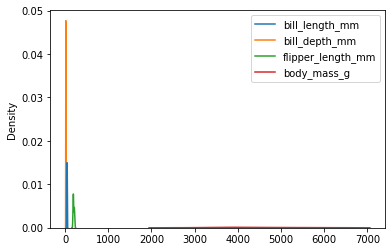

In [11]:
# Ojo los Features numéricos son un drama -> escalas muy disintas
X = dataset.select_dtypes('number')
X.head()
sns.kdeplot(data = X)
plt.show()

#### This Kind of Multiple Kernel Density of Numeric Features Just Works on Google Colab ver of `seaborn`

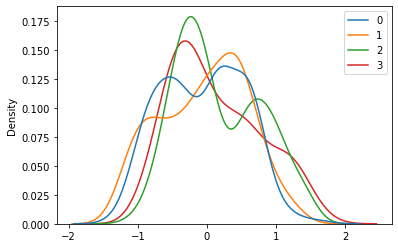

In [15]:
from sklearn import preprocessing
X = dataset.select_dtypes('number')
robust_scaler = preprocessing.RobustScaler()
X_robust = robust_scaler.fit_transform(X)
sns.kdeplot( data= X_robust)
plt.show()

In [16]:
dataset_enc = dataset.copy()
dataset_enc = dataset_enc.replace({"sex": {"Male": 0, "Female": 1}})

In [17]:
dataset_enc['sex'].head()

0    0
1    1
2    1
4    1
5    0
Name: sex, dtype: int64

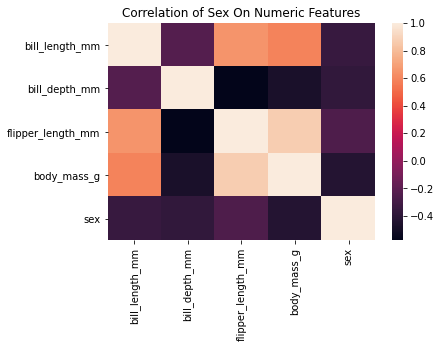

In [18]:
import matplotlib.pyplot as plt
sns.heatmap(dataset_enc.corr())
plt.title('Correlation of Sex On Numeric Features')
plt.show()

Naive Features Extraction w/ Numeric Variables: if we see all 4 numeric varibles are poor correlated with `sex`, however if we select the `body_mass` as one of the relevant features we can drop `flipper_length` and `bill_length`

## Classifying with Numeric Variables (All-In): Untransformed



In [19]:
# First Attempt With No Categorical Features and No Scaling 
X = dataset_enc.iloc[:,:-1].select_dtypes('number')
# print( X.head() )
y = dataset_enc.iloc[:,-1]
# print (y.head() )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
#Create the Linear SVM Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', 
                 random_state = 0)
                #  probability=True)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[29  5]
 [ 4 46]]
Accuracy: 88.38 %
Standard Deviation: 8.46 %


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.90      0.92      0.91        50

    accuracy                           0.89        84
   macro avg       0.89      0.89      0.89        84
weighted avg       0.89      0.89      0.89        84



In [22]:
print(f"Score on Training Set {100*classifier.score(X_train, y_train)}")
print(f"Score on Test Set {100*classifier.score(X_test, y_test)}")

Score on Training Set 90.76305220883533
Score on Test Set 89.28571428571429


In [56]:
# from sklearn.metrics import roc_curve, roc_auc_score
# model.classes_
#Transform into probabilities

# new_probs = []
# for value in y_test['sex']:
#   if value == "Male":
#     new_probs.append(1.0)
#   else:
#     new_probs.append(0.0)

fpr, tpr, thresholds = roc_curve(y_test, list(classifier.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

AttributeError: ignored

62     1
60     1
283    0
107    0
65     0
      ..
228    1
206    1
260    1
263    0
337    0
Name: sex, Length: 84, dtype: int64

## Classifying with just two relevant variables `body_mass_g` and `bill_depth_mm`




In [24]:
#Using just apparent relevant variables (body_mass_g, bill_depth_mm).
X_reduced = dataset.loc[:,['body_mass_g','bill_depth_mm']]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.25, random_state = 0)
classifier_reduced = SVC(kernel = 'linear', 
                         random_state = 0)
classifier_reduced.fit(X_train_reduced, y_train)
#Make the prediction
y_pred = classifier_reduced.predict(X_test_reduced)

# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_reduced, X = X_train_reduced, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[32  2]
 [ 4 46]]
Accuracy: 89.18 %
Standard Deviation: 7.37 %


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.96      0.92      0.94        50

    accuracy                           0.93        84
   macro avg       0.92      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



In [26]:
print(f"Score on Training Set {100*classifier_reduced.score(X_train_reduced, y_train)}")
print(f"Score on Test Set {100*classifier_reduced.score(X_test_reduced, y_test)}")

Score on Training Set 89.5582329317269
Score on Test Set 92.85714285714286


## Brute Force `GridSearchCV` with reduced Numeric Features

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.001, 0.10, 0.1, 1., 10, 25, 50, 100, 1000]}  
  
grid = GridSearchCV(SVC(random_state=0, kernel='linear'), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_reduced, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.780, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.740, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.820, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.680, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.735, total=   0.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.820, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.860, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.939, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.820, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.940, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] .

In [21]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 10, 'kernel': 'linear'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


In [23]:
# Double check
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.759 (+/-0.092) for {'C': 0.001, 'kernel': 'linear'}
0.884 (+/-0.095) for {'C': 0.1, 'kernel': 'linear'}
0.884 (+/-0.095) for {'C': 0.1, 'kernel': 'linear'}
0.891 (+/-0.079) for {'C': 10, 'kernel': 'linear'}
0.887 (+/-0.084) for {'C': 25, 'kernel': 'linear'}
0.884 (+/-0.075) for {'C': 50, 'kernel': 'linear'}
0.887 (+/-0.084) for {'C': 100, 'kernel': 'linear'}
0.884 (+/-0.075) for {'C': 1000, 'kernel': 'linear'}



In [30]:
classifier_reduced.fit(X_train_reduced, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
classifier_reduced.score(X_train_reduced, y_train)

0.8955823293172691

In [37]:
classifier_reduced.score(X_test_reduced, y_test)

0.9285714285714286

## All In With Dummies Species (As Maxi Suggests) Mixed With Bagging

In [38]:
dataset.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [41]:
# Xall = dataset.drop('sex', axis=1)
# Xall.head()
Xallnumeric

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0


In [43]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
np.random.seed(1234)

In [44]:
X = pd.get_dummies(dataset.iloc[:,:-1])
X.head(10)
# Y = dataset['sex']
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1
6,38.9,17.8,181.0,3625.0,1,0,0,0,0,1
7,39.2,19.6,195.0,4675.0,1,0,0,0,0,1
12,41.1,17.6,182.0,3200.0,1,0,0,0,0,1
13,38.6,21.2,191.0,3800.0,1,0,0,0,0,1
14,34.6,21.1,198.0,4400.0,1,0,0,0,0,1


In [49]:
# Testing if RobustScaler affect Dummies -> 
# from sklearn import preprocessing
# robust_scaler = preprocessing.RobustScaler()
# X_robust = robust_scaler.fit_transform(X)
X_robust[0:9,:]

array([[-0.59340659,  0.4516129 , -0.69565217, -0.24489796,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.54945055,  0.03225806, -0.47826087, -0.20408163,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.46153846,  0.22580645, -0.08695652, -0.65306122,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.85714286,  0.64516129, -0.17391304, -0.48979592,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.57142857,  1.06451613, -0.30434783, -0.32653061,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.61538462,  0.16129032, -0.69565217, -0.34693878,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.58241758,  0.74193548, -0.08695652,  0.51020408,  1.        ,
         0.        ,  0.        ,  0.        

In [80]:
Y = dataset['sex']
X_train, X_test, Y_train, Y_test = train_test_split(X_robust,Y)
base_est = SVC(kernel='linear',
               random_state=0)
ensemble_model = BaggingClassifier(base_est, n_estimators=5, max_samples=10, max_features=2)

In [81]:
ensemble_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='linear',
                                     max_iter=-1, probability=False,
                                     random_state=0, shrinking=True, tol=0.001,
                                     verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=2,
                  max_samples=10, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [82]:
ensemble_model.score(X_test, Y_test)

0.39285714285714285

In [77]:
base_est.fit(X_test, Y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
print(f"Score in Training Set: {100*base_est.score(X_train, Y_train)}%")
print(f"Score in Test Set: {100*base_est.score(X_test, Y_test)}%")

Score in Training Set: 85.94377510040161%
Score in Test Set: 95.23809523809523%


In [92]:
Xnumeric = dataset.select_dtypes('number')
# Xnumeric.head()
# Y.head()
X_train, X_test, Y_train, Y_test = train_test_split(Xnumeric,Y)
base_est = SVC(kernel='linear',
               random_state=0)
# ensemble_model = BaggingClassifier(base_est, n_estimators=5, max_samples=10, max_features=2)

In [93]:
base_est.fit(X_train, Y_train)
print(f"Score in Training Set: {100*base_est.score(X_train, Y_train)}%")
print(f"Score in Test Set: {100*base_est.score(X_test, Y_test)}%")

Score in Training Set: 88.75502008032129%
Score in Test Set: 84.52380952380952%


In [96]:
ensemble_model = BaggingClassifier(base_est, n_estimators=5, max_samples=20, max_features=3)
ensemble_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='linear',
                                     max_iter=-1, probability=False,
                                     random_state=0, shrinking=True, tol=0.001,
                                     verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=3,
                  max_samples=20, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [97]:
print(f"Score in Training Set: {100*ensemble_model.score(X_train, Y_train)}%")
print(f"Score in Test Set: {100*ensemble_model.score(X_test, Y_test)}%")

Score in Training Set: 86.74698795180723%
Score in Test Set: 84.52380952380952%
